# SVR

### importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### importing the dataset and defining x and y

In [2]:
df=pd.read_csv('train.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

### imputing for missing values:

In [3]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
x=si.fit_transform(x)

### splitting into train test sets

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)


### training svr based on this model:


In [29]:
from sklearn.svm import SVR
svrm=SVR(kernel='poly')
svrm.fit(x_train,y_train)

d:\programming\pythonstuff\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### predicting y:

In [30]:
y_pred=svrm.predict(x_test)

### plotting actual vs predicted values

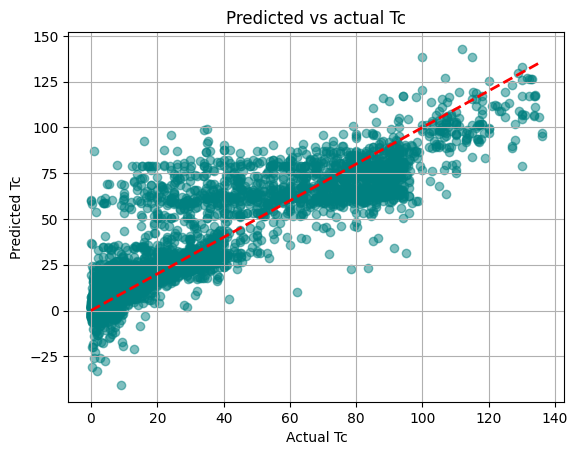

In [31]:
actual=sc_y.inverse_transform(y_test)
predicted=sc_y.inverse_transform(y_pred.reshape(-1,1))
plt.figure()
plt.scatter(actual,predicted,c='teal',alpha=0.5)
plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],'r--',lw=2)
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted Tc")
plt.title("Predicted vs actual Tc")
plt.show()

### R2 and RMSE:

In [32]:
from sklearn.metrics import r2_score,root_mean_squared_error

r2=r2_score(actual,predicted)
print(r2)

rmse=root_mean_squared_error(actual,predicted)
print(rmse)

0.7985157794391053
15.313672223122499


## PCA

In [33]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)



### fitting a model:

### modelingL


In [36]:
from sklearn.svm import SVR
svrp=SVR(kernel='rbf')
svrp.fit(x_train_pca,y_train)

d:\programming\pythonstuff\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### predicting y:

In [37]:
y_pred_pca=svrp.predict(x_test_pca)

### plotting actual vs predicted values:

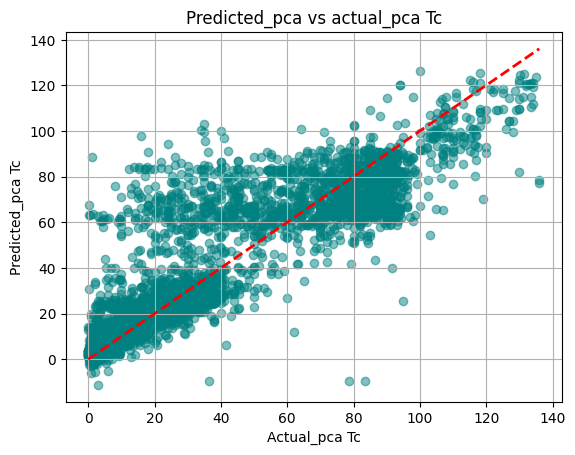

In [39]:
actual_pca=sc_y.inverse_transform(y_test)
predicted_pca=sc_y.inverse_transform(y_pred_pca.reshape(-1,1))
plt.figure()
plt.scatter(actual_pca,predicted_pca,c='teal',alpha=0.5)
plt.plot([actual_pca.min(),actual_pca.max()],[actual_pca.min(),actual_pca.max()],'r--',lw=2)
plt.grid(True)
plt.xlabel("Actual_pca Tc")
plt.ylabel("Predicted_pca Tc")
plt.title("Predicted_pca vs actual_pca Tc")
plt.show()

### R2 and RMSE values

In [40]:
from sklearn.metrics import r2_score,root_mean_squared_error

r2_pca=r2_score(actual_pca,predicted_pca)
print(r2_pca)

rmse_pca=root_mean_squared_error(actual_pca,predicted_pca)
print(rmse_pca)

0.7970385418865293
15.369707922048551
